In [1]:
import pandas as pd

# Read Data
df = pd.read_csv("data.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [48]:
import numpy as np

# Preprocess Data
df = df.drop(columns=["id", "Unnamed: 32"])
X_df = df.drop(columns=["diagnosis"])
y_df = df["diagnosis"]

# Convert to numpy
X = X_df.to_numpy()
y = y_df.to_numpy()

In [49]:
# Scale Data
mean = X.mean(axis=0)
std = X.std(axis=0)
X_scaled = (X - mean) / std

In [50]:
class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.eigenvalues = None

    def compute_pca(self, X_scaled):
        # Compute covariance matrix
        cov_matrix = np.cov(X_scaled, rowvar=False)
        '''n = X_scaled.shape[0]
        cov_matrix2 = (X_scaled.T @ X_scaled) / (n - 1)
        print(np.allclose(cov_matrix, cov_matrix2))'''
        
        # Eigen decomposition
        self.eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # Select top k components
        self.components = eigenvectors[:, -self.n_components:][:, ::-1]

        # Project data
        X_pca = X_scaled @ self.components

        return X_pca
    
    def reconstruct(self, X_projected):
        return X_projected @ self.components.T
    
    def reconstruction_error(self, X_scaled, X_reconstructed):
        return np.mean((X_scaled - X_reconstructed) ** 2)
    
    def explained_variance(self):
        total_variance = np.sum(self.eigenvalues)
        pca_variance = self.eigenvalues[-self.n_components:][::-1]
        return pca_variance / total_variance

In [51]:
# Pca with 2 components
pca = PCA(n_components=2)
X_pca = pca.compute_pca(X_scaled)
X_reconstructed = pca.reconstruct(X_pca)
error = pca.reconstruction_error(X_scaled, X_reconstructed)
explained_var = pca.explained_variance()

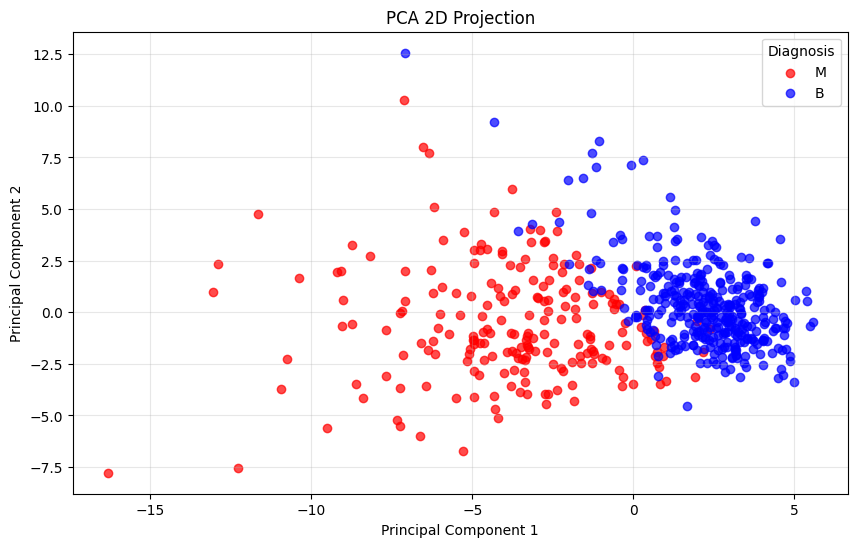

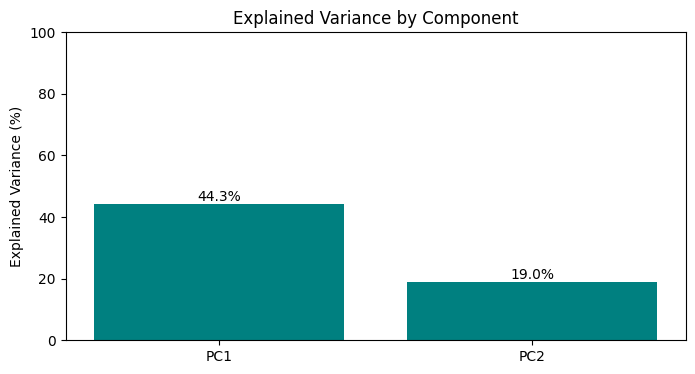

Total Explained Variance: 63.24%
Reconstruction Error: 0.3676


In [52]:
import matplotlib.pyplot as plt
import numpy as np

# 2D Projection Scatter plot
plt.figure(figsize=(10, 6))
for label, color in zip(['M', 'B'], ['red', 'blue']):
    mask = (y == label)
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], c=color, label=label, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA 2D Projection')
plt.legend(title='Diagnosis')
plt.grid(True, alpha=0.3)
plt.show()

# 2. Scree Plot for Explained Variance
plt.figure(figsize=(8, 4))

labels = [f'PC{i+1}' for i in range(len(explained_var))]

plt.bar(labels, explained_var * 100, color='teal')
plt.ylabel('Explained Variance (%)')
plt.title('Explained Variance by Component')
plt.ylim(0, 100)

for i, v in enumerate(explained_var):
    plt.text(i, v*100 + 1, f'{v:.1%}', ha='center')

plt.show()

print(f"Total Explained Variance: {np.sum(explained_var):.2%}")
print(f"Reconstruction Error: {error:.4f}")